### 📊 Análise de Vendas - Loja Fictícia

#### 1. Introdução
#### 2. Carregamento dos Dados
#### 3. Exploração Inicial dos Dados
#### 4. Limpeza e Preparação dos Dados
#### 5. Análise Exploratória (EDA)
#### 6. Conclusões e Insights

### 1. Introdução 
Este projeto tem como objetivo analisar as vendas de uma loja fictícia entre 2023 e 2024. A partir dos dados, serão extraídos insights sobre os produtos mais vendidos, faturamento por região, desempenho por categoria, sazonalidade e mais.

Ferramentas utilizadas:
- Python (Pandas, Matplotlib, Seaborn)
- Jupyter Notebook

### 2. Carregamento dos Dados

In [13]:
import pandas as pd

# Carregar o CSV
df = pd.read_csv("dataset_vendas_loja.csv")

# Exibir as primeiras linhas
df.head()

,Data da Venda,Produto,Categoria,Preço Unitário,Quantidade Vendida,Região,Vendedor
0,2023-04-08,Bolsa Feminina,Acessórios,150,5,Nordeste,Daniela
1,2023-01-01,Bolsa Feminina,Acessórios,150,5,Sul,Carlos
2,2023-06-13,Calça Jeans,Vestuário,120,8,Sudeste,Bruno
3,2023-01-25,Fone de Ouvido,Eletrônicos,200,3,Norte,Daniela
4,2023-02-18,Calça Jeans,Vestuário,120,4,Centro-Oeste,Bruno


### 3. Exploração Inicial dos Dados

In [18]:
# Ver tamanho do dataset
df.shape

(500, 7)

In [20]:
# Ver informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data da Venda       500 non-null    object
 1   Produto             500 non-null    object
 2   Categoria           500 non-null    object
 3   Preço Unitário      500 non-null    int64 
 4   Quantidade Vendida  500 non-null    int64 
 5   Região              500 non-null    object
 6   Vendedor            500 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB


In [22]:
# Ver estatísticas básicas
df.describe()

,Preço Unitário,Quantidade Vendida
count,500.000000,500.000000
mean,694.800000,5.630000
std,1075.752689,2.941838
min,70.000000,1.000000
25%,120.000000,3.000000
50%,200.000000,6.000000
75%,300.000000,8.000000
max,3500.000000,10.000000


In [24]:
# Ver colunas únicas
df.nunique()

Data da Venda         277
Produto                 9
Categoria               4
Preço Unitário          9
Quantidade Vendida     10
Região                  5
Vendedor                8
dtype: int64

### 4. Limpeza e Preparação dos Dados

In [33]:
# Converter a coluna de data
df["Data da Venda"] = pd.to_datetime(df["Data da Venda"])

# Criar colunas de Ano, Mês e Faturamento
df["Ano"] = df["Data da Venda"].dt.year
df["Mês"] = df["Data da Venda"].dt.month
df["Faturamento"] = df["Preço Unitário"] * df["Quantidade Vendida"]
df.head()

,Data da Venda,Produto,Categoria,Preço Unitário,Quantidade Vendida,Região,Vendedor,Ano,Mês,Faturamento
0,2023-04-08,Bolsa Feminina,Acessórios,150,5,Nordeste,Daniela,2023,4,750
1,2023-01-01,Bolsa Feminina,Acessórios,150,5,Sul,Carlos,2023,1,750
2,2023-06-13,Calça Jeans,Vestuário,120,8,Sudeste,Bruno,2023,6,960
3,2023-01-25,Fone de Ouvido,Eletrônicos,200,3,Norte,Daniela,2023,1,600
4,2023-02-18,Calça Jeans,Vestuário,120,4,Centro-Oeste,Bruno,2023,2,480


In [35]:
# Verificar valores ausentes
df.isnull().sum()

Data da Venda         0
Produto               0
Categoria             0
Preço Unitário        0
Quantidade Vendida    0
Região                0
Vendedor              0
Ano                   0
Mês                   0
Faturamento           0
dtype: int64

### 5. Análise Exploratória (EDA)

#### Produtos mais vendidos

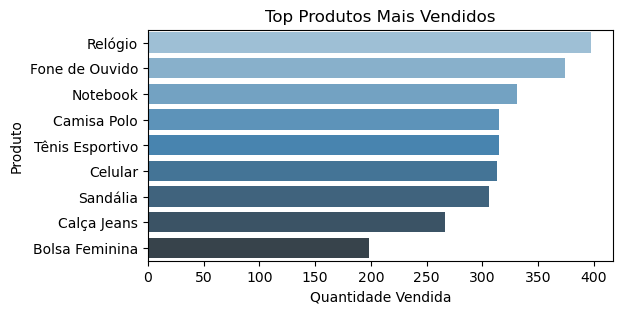

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,3))
sns.barplot(
    x=top_produtos.values, 
    y=top_produtos.index, 
    hue=top_produtos.index, 
    palette="Blues_d", 
    legend=False
)
plt.title("Top Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.show()

#### Faturamento por Categoria

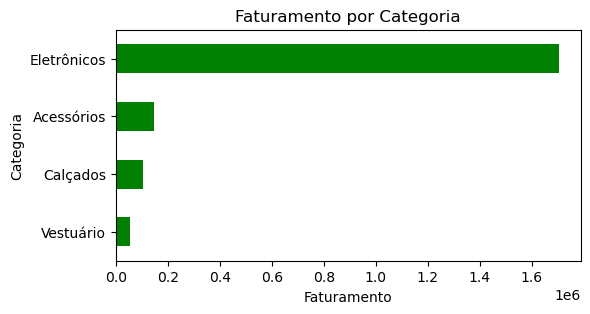

In [46]:
cat_fat = df.groupby("Categoria")["Faturamento"].sum().sort_values()

plt.figure(figsize=(6,3))
cat_fat.plot(kind="barh", color="green")
plt.title("Faturamento por Categoria")
plt.xlabel("Faturamento")
plt.ylabel("Categoria")
plt.show()

#### Faturamento por Região

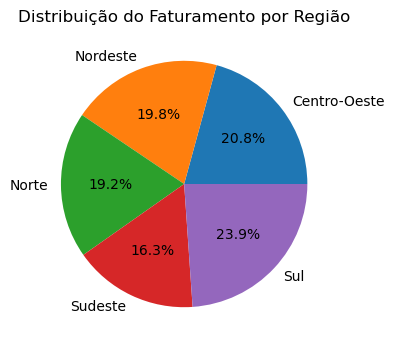

In [55]:
df.groupby("Região")["Faturamento"].sum().plot(kind="pie", autopct="%.1f%%", figsize=(4,4))
plt.title("Distribuição do Faturamento por Região")
plt.ylabel("")
plt.show()

#### Faturamento ao Longo do Tempo

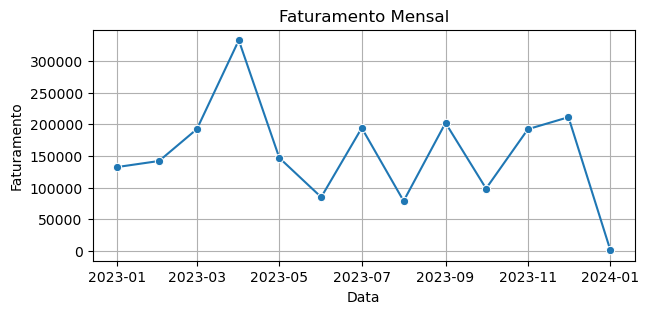

In [66]:
# Renomeia colunas para o formato aceito pelo pandas
df_mensal_ajustado = df_mensal.rename(columns={"Ano": "year", "Mês": "month"})

# Cria a coluna "Data" com dia fixo como 1º
df_mensal["Data"] = pd.to_datetime(df_mensal_ajustado[["year", "month"]].assign(day=1))


plt.figure(figsize=(7,3))
sns.lineplot(data=df_mensal, x="Data", y="Faturamento", marker="o")
plt.title("Faturamento Mensal")
plt.xlabel("Data")
plt.ylabel("Faturamento")
plt.grid(True)
plt.show()

### 6. Conclusões e Insights 

In [82]:
# Produto mais vendido em quantidade:
df.groupby("Produto")["Quantidade Vendida"].sum().sort_values(ascending=False).head(1)

Produto
Relógio    397
Name: Quantidade Vendida, dtype: int64

In [86]:
# Produto com maior faturamento:
df.groupby("Produto")["Faturamento"].sum().sort_values(ascending=False).head(1)

Produto
Notebook    1158500
Name: Faturamento, dtype: int64

In [88]:
# Região com maior faturamento:
df.groupby("Região")["Faturamento"].sum().sort_values(ascending=False)

Região
Sul             480170
Centro-Oeste    416850
Nordeste        397630
Norte           385910
Sudeste         328240
Name: Faturamento, dtype: int64

In [90]:
# Categoria com maior faturamento:
df.groupby("Categoria")["Faturamento"].sum().sort_values(ascending=False)

Categoria
Eletrônicos    1702800
Acessórios      148800
Calçados        103230
Vestuário        53970
Name: Faturamento, dtype: int64

In [92]:
# Mês com maior faturamento:
df_mensal.sort_values("Faturamento", ascending=False).head(1)

,Ano,Mês,Faturamento,Data
3,2023,4,332650,2023-04-01


In [94]:
# Vendedor com maior faturamento:
df.groupby("Vendedor")["Faturamento"].sum().sort_values(ascending=False).head(1)

Vendedor
Gabriel    369810
Name: Faturamento, dtype: int64

#### Principais Insights:

- Produto mais vendido em quantidade:
Relógio, com 397 unidades vendidas.

- Produto com maior faturamento:
Notebook, gerando R$1.158.500 em receita.

- Região com maior faturamento:
Sul, com aproximadamente R$480.170 em vendas.

- Categoria com maior faturamento:
Eletrônicos, totalizando R$1.702.800.

- Mês com maior faturamento:
Abril/2023, com R$332.650.

- Vendedor com melhor desempenho:
Gabriel, com um faturamento total de R$369.810.